## Size verilen veri seti üzerinden KNN, Destek Vektör Makineleri, Karar ağaçları ve Ensemble metotları kullanarak bir bankanın hangi müşteriye kredi kartı vereceğine hangi müşterilere vermeyeceğine karar veren bir sınıflandırma modeli oluşturunuz. Sonuçları karşılaştırarak hangi modelin tahmin performansının daha iyi olduğunu belirtiniz.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('KrediKartıVerileri.xlsx', index_col=0)

### Modellemeden önce veri setimizi inceliyoruz.

In [4]:
df

,Kart,Rapor,Yaş,Gelir,Pay,Harcama,Malik,İşDurumu,Bağımlılık,İkametSüresi,AnaKart,AktifKart
1,evet,0,37.66667,4.5200,0.033270,124.983300,evet,hayır,3,54,1,12
2,evet,0,33.25000,2.4200,0.005217,9.854167,hayır,hayır,3,34,1,13
3,evet,0,33.66667,4.5000,0.004156,15.000000,evet,hayır,4,58,1,5
4,evet,0,30.50000,2.5400,0.065214,137.869200,hayır,hayır,0,25,1,7
5,evet,0,32.16667,9.7867,0.067051,546.503300,evet,hayır,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,evet,0,33.58333,4.5660,0.002146,7.333333,evet,hayır,0,94,1,19
1316,hayır,5,23.91667,3.1920,0.000376,0.000000,hayır,hayır,3,12,1,5
1317,evet,0,40.58333,4.6000,0.026513,101.298300,evet,hayır,2,1,1,2
1318,evet,0,32.83333,3.7000,0.008999,26.996670,hayır,evet,0,60,1,7


In [5]:
df.isnull().sum()  # Null değeri bulunmuyor verimizde.

Kart            0
Rapor           0
Yaş             0
Gelir           0
Pay             0
Harcama         0
Malik           0
İşDurumu        0
Bağımlılık      0
İkametSüresi    0
AnaKart         0
AktifKart       0
dtype: int64

### Bağımsız değişkenlerimizden 2 tanesi categorical, bu değişkenleri verimizi böldükten sonra numericala dönüştürücez.

In [6]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 1 to 1319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kart          1319 non-null   object 
 1   Rapor         1319 non-null   int64  
 2   Yaş           1319 non-null   float64
 3   Gelir         1319 non-null   float64
 4   Pay           1319 non-null   float64
 5   Harcama       1319 non-null   float64
 6   Malik         1319 non-null   object 
 7   İşDurumu      1319 non-null   object 
 8   Bağımlılık    1319 non-null   int64  
 9   İkametSüresi  1319 non-null   int64  
 10  AnaKart       1319 non-null   int64  
 11  AktifKart     1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 134.0+ KB


### Imbalanced durumu söz konusu ancak örnek sayısı çok olmadığı için olumsuz bir durum oluşturmayacaktır. Tahmin performansı düşük olması durumunda ele alınabilir.

In [7]:
df['Kart'].value_counts()

evet     1023
hayır     296
Name: Kart, dtype: int64

# KNN  (K-Nearest Neighbors)

### KNN algoritması benzer şeyler birbirine yakındır mantığını kabul eder. Yani sınıflandırılacak(tahminlenecek) olan veriyi daha önceki verilerle olan yakınlık ilişkisine (en yakın komşularına) göre sınıflandıran bir algoritmadır. En önemli parametresi k parametresidir (aşağıda ne_neighbors olarak geçen). Bir örnekle; A ve B sınıflarımız olsun, k = 3 olarak alırsak, yeni gelen verinin eski verilere olan uzaklıkları ölçülür ve en yakın 3 tanesi belirlenir. Bu en yakın verilerden 2'si A sınıfında ve 1'i B sınıfındadır. Bu durumda algoritma yeni gelen verinin A sınıfında olduğuna karar verir.

https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

### Verilerimizi y(bağımlı değişken) ve X(bağımsız değişkenler) olarak ayırıyor ve bağımsız değişkenler içinde bulunan categorical verileri numericala dönüştürüyoruz.

In [8]:
X = df.drop('Kart', axis = 1)
y = df['Kart']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

### Verilerimizi train ve test olarak ayırıyoruz.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modeli çağırıp ilk olarak n_neighbors parametresini 1 olarak veriyoruz.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

### Modelimizin performansına bakıyoruz f1 scorelar 0.96 ve 0.89 olarak çıktı.

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       0.98      0.95      0.96       254
       hayır       0.85      0.92      0.89        76

    accuracy                           0.95       330
   macro avg       0.91      0.94      0.93       330
weighted avg       0.95      0.95      0.95       330



In [18]:
print(confusion_matrix(y_test, y_pred))

[[242  12]
 [  6  70]]


### Gridsearch cross validation kullanarak n_neighbors parametresini optimize ederek en iyi performansı verecek değeri elde ediyoruz.

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_params = {'n_neighbors' : np.arange(1, 50)}

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

### Gridsearch cv sonunda 5 parametresini elde ettik. 1-50 arasındaki tüm değerler denendi 5 en iyi sonuç veren olarak seçildi.

In [23]:
knn_cv_model.best_params_

{'n_neighbors': 5}

In [24]:
knn_tuned = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [25]:
y_pred = knn_tuned.predict(X_test)

### n_neighbors 5 olarak alındı ve f1 scorelar 0.96 ve 0.89 çıktı. Yukardan farklı olarak precision 1 oldu.

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.93      0.96       254
       hayır       0.82      0.99      0.89        76

    accuracy                           0.95       330
   macro avg       0.91      0.96      0.93       330
weighted avg       0.95      0.95      0.95       330



In [27]:
print(confusion_matrix(y_test, y_pred))

[[237  17]
 [  1  75]]


### Diğer modellerle performans karşılaştırması yapabilmek için f1_score'ları (evet ve hayır için ayrı olarak) değişkenlere atıyoruz. (En son grafik üzerinden görebilmek için)

In [28]:
knn_f1_hayır = f1_score(y_test, y_pred, pos_label='hayır')

In [29]:
knn_f1_evet = f1_score(y_test, y_pred, pos_label='evet')

# SVM (Support Vector Machine)

### Destek Vektör Makineleri, temel olarak iki sınıfa ait verileri birbirinden en uygun şekilde ayırmak için kullanılır. Bunun için karar sınırları yada diğer bir ifadeyle hiper düzlemler belirlenir. 

### Elimizde şu anda iki sınıfa ait örnekler bulunmakta, doğrusal olarak dağıldığını varsayarsak; bu durumda veri setini ikiye ayıran bir karar doğrusu oluşturulur ve sınfılandırma yapılır. Aşağıda c parametresi ile gösterilen margin değeri ile karar doğrusunun iki yannda oluşturduğumuz  destek vektörleri ile sınıfların bribirlerinden uzaklıklarını ayarlayabiliriz (soft margin , hard margin). 

### Elimizdeki verilerin doğrusal olarak dağılmadılarsa (doğrusal olmayan veriler); destek vektör makineleri doğrusal bir düzlem çizemez, doğrusal bir düzlem ile ayrım yapamaz bu yüzden kernel trick (polynomial kernel ve Gaussian RBF) kullanılarak 3. boyutta işlem yapılarak sınıflandırma yapılır. Kısacası, 2 boyutta sınıflandırma mümkün değilse değişimleri boyut arttırarak çözüyormuş gibi yaparak kernel trick kullanılır. 2 boyutta açıklayamadığımız veri setimizi daha fazla boyutta açıklamak için kullanılan Kernel Trick metoduna Polynomial Kernel denir. Her bir noktanın belirli bir noktaya ne kadar benzediğini normal dağılım ile hesaplayan, ona göre sınıflandıran Kernel Trick metoduna RBF Kernel denir.

https://en.wikipedia.org/wiki/Support-vector_machine

https://scikit-learn.org/stable/modules/svm.html

In [40]:
X = df.drop('Kart', axis = 1)
y = df['Kart']

In [41]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.svm import SVC

### Modeli çağırıp default parametrelerde (C = 1.0, kernel = RBF, gamma = 'scale') fit ve train ederek tahminlemede bulunuyoruz.

In [34]:
model = SVC().fit(X_train, y_train)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.89      0.94       254
       hayır       0.74      1.00      0.85        76

    accuracy                           0.92       330
   macro avg       0.87      0.95      0.90       330
weighted avg       0.94      0.92      0.92       330



In [37]:
print(confusion_matrix(y_test, y_pred))

[[227  27]
 [  0  76]]


### Gridsearch cross validation kullanarak C, gamma ve kernel parametrelerimi optimize ederek en iyi performansı verecek değerleri elde ediyoruz.

In [38]:
param_grid = {'C': [1, 100, 1000], 'gamma': [1,0.1,0.01], 'kernel': ['rbf', 'linear']}

In [43]:
model_cv = GridSearchCV(SVC(), param_grid, verbose = 3, refit = True)

In [44]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.970 total time=   0.6s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.985 total time=   0.5s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.985 total time=   0.1s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.995 total time=   0.8s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.985 total time=   0.8s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [45]:
model_cv.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

### Gridsearch cv sonucunda, C = 100, gamma =1 ve kernel linear olarak elde edildi.

### C'nin yüksek olması soft margin yani destek vektörleri düzleminin dar olması. kernel'in linear olması ise doğrusal olarak ayrılabildiğini gösterir.

In [46]:
model_cv = SVC(C = 100, gamma=1, kernel='linear').fit(X_train, y_train)

In [47]:
y_pred_cv = model_cv.predict(X_test)

### Optimizasyon sonucunda, sınıflandırma performansı yükseldi ve 0.99, 0.96 elde edildi.

In [49]:
print(confusion_matrix(y_test, y_pred_cv))

[[247   7]
 [  0  76]]


In [50]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

        evet       1.00      0.97      0.99       254
       hayır       0.92      1.00      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



In [51]:
svm_f1_hayır = f1_score(y_test, y_pred_cv, pos_label='hayır')

In [52]:
svm_f1_evet = f1_score(y_test, y_pred_cv, pos_label='evet')

# DT (Decision Tree)

### Karar ağaçları algoritması karar düğümleri, dallar ve yapraklardan oluşan bir ağacı simüle etmektedir. En üstte gini index veya entropy (bizim seçimize bağlı) kriterlerine göre belirlenen (en ayırıcı değişken) root node (ana düğüm) bulunmaktadır. Aşağıya doğru dallanarak yaprak dediğimiz karar kısmına iner. Gini index veya entropy'e göre verimizi (elimizde veri sınıflandırma verisi) en iyi temsil eden değişkenleri kullanarak sınıflandırarak ilerler.

### Ağaç düğüm olarak başlıyor, belirli kritere göre bir alt düğüme iniyor. Eğer o düğümdeki örneklerin hepsi aynı sınıfa aitse yaprak olarak sonlanıyor ve sınıflanıyor. Eğer aynı örneklere ait değilse alt düğüme inmeye devam ediyor.

### Önemli olan ve optimizasyonda ele alınması gereken parametreler; max_depth parametresi ağacın ne kadar derine ineceğini belirler. max_feature parametresi ise bölme kararını vermek için her seferinde dikkate alınması gereken özelliklerin sayısıdır.

https://en.wikipedia.org/wiki/Decision_tree_learning

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

In [61]:
X = df.drop('Kart', axis = 1)
y = df['Kart']

In [62]:
X = pd.get_dummies(X, drop_first=True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

### Modelimizi çağırıp default değerlerle fit ve train ederek tahminliyoruz. criterion = 'gini', max_depth = 'none', max_features = 'none'.

In [57]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [58]:
y_pred = dt_model.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[248   6]
 [  1  75]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.98      0.99       254
       hayır       0.93      0.99      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.98      0.97       330
weighted avg       0.98      0.98      0.98       330



### Performansı optimize etmek maksadıyla, gridsearch cv ile parametre ayarlaması yapıyoruz. Elde ettiğimiz değerleri kullanarak modelimizi tekrar kuruyoruz.

In [64]:
dt_params = {'criterion' : ['gini', 'entropy'],
            'max_depth' : [3, 5, 7]
            }

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt_cv = GridSearchCV(dt, dt_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, 

In [67]:
dt_cv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [68]:
dt_tuned = DecisionTreeClassifier(criterion='entropy',
                                  max_depth = 3).fit(X_train, y_train)

In [69]:
print(confusion_matrix(y_test, y_pred))

[[248   6]
 [  1  75]]


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.98      0.99       254
       hayır       0.93      0.99      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.98      0.97       330
weighted avg       0.98      0.98      0.98       330



### Karar ağaçları week learner (zayıf öğrenici) olarak tanımlanmaktadır. Daha iyi performans ve karar ağaçlarında sıkça karşılaşılan overfitting durumunu aşmak için ensemle methodlar kullanılmaktadır. Bu methodlar bagging ve boostingdir. En popüler algoritmaları ise Random Forest ve XGBoost'tur.

In [73]:
dt_tuned_f1_hayır = f1_score(y_test, y_pred, pos_label='hayır')

In [74]:
dt_tuned_f1_evet = f1_score(y_test, y_pred, pos_label='evet')

# Ensemble Yöntemleri

### Ensemble methodları en basit tanımıyla; bir çok karar ağacının kullanımıyla sonuç elde edilmesidir. Kullanılan bu karar ağaçlarının her birinde farklı değişkenler kullanılır ve overfit olma durumu engellenir, daha iyi performans elde edilir. 

### Kullanılan yöntemlerden bagging'de karar ağaçları birbirine paraleldir. En sonda çoğunluk sınıflandırmasına göre karar verilir.

### Boosting'de ise karar ağaçları birbirini sıralı olarak takip eder. Bir karar ağacından alınan değerler diğer ağaca tatbik edilerek, sonuç optimize edilerek ilerler ve sonucunda sınıflandırma çıkar.

https://www.toptal.com/machine-learning/ensemble-methods-machine-learning

## RF (Random Forest) (Bagging)

### Random forest bagging ensemle methodudur. Önemli parametreleri; n_estimators, ağaç sayısını belirtir. criterion, max_depth ve max_features decisiton tree'de belirtildiği gibidir.

In [83]:
X = df.drop('Kart', axis = 1)
y = df['Kart']

In [84]:
X = pd.get_dummies(X, drop_first=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier

### Modelimizi çağırıp default değerlerle fit ve train ederek tahminliyoruz. n_estimators = 100, max_depth = 'none', max_features = 'auto'.

In [79]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [80]:
y_pred = rf_model.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))

[[247   7]
 [  0  76]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.97      0.99       254
       hayır       0.92      1.00      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



### Görüldüğü üzere default değerler kullanılmasına rağmen performansı karar ağaçlarından daha yüksek çıktı. Sonucu optimize etmek üzere gridseacrh cv ile parametre ayarlaması yapıyoruz.

In [86]:
rf = RandomForestClassifier()

In [87]:
rf_params = {'n_estimators' : [50, 100, 300],
            'max_depth' : [3, 5, 7],
            'max_features' : [2, 4, 6, 8],
            'min_samples_split' : [2, 4, 6]
            }

In [88]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=100; t

[CV] END max_depth=3, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.4s
[CV] END max_depth=3, max_features=6, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=6, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=6, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=6, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=6, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=6, min_sam

[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=3, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=2, min_

[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=4, min_samples_split=6, n_estimators=300; total time=   0.5s
[CV] END max_depth=5, max_features=6, mi

[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=8, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END max_depth=5, max_features=8, min_sa

[CV] END max_depth=7, max_features=4, min_samples_split=4, n_estimators=300; total time=   0.5s
[CV] END max_depth=7, max_features=4, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, max_features=4, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=4, min_sam

[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=300; total time=   0.5s
[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, max_features=8, min_samples_split=4, n_estimators=300; total time=   0.5s
[CV] END max_depth=7, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=8, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=7, max_features=8, min_sa

In [89]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [99]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  n_estimators = 100).fit(X_train, y_train)

In [100]:
y_pred = rf_tuned.predict(X_test)

### GridsearchCV sonucunda, sınıflandırma performansı yükseldi ve 0.99, 0.96 elde edildi.

In [101]:
print(confusion_matrix(y_test, y_pred))

[[247   7]
 [  0  76]]


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.97      0.99       254
       hayır       0.92      1.00      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



In [103]:
rf_tuned_f1_hayır = f1_score(y_test, y_pred, pos_label='hayır')

In [104]:
rf_tuned_f1_evet = f1_score(y_test, y_pred, pos_label='evet')

## XGboost (Boosting)

### XGBoost boosting ensemble methodudur. Burda diğer parametrelerden farklı olarak learning_rate önemlidir. Çünkü karar ağaçları sıralıdır ve bir ağaçtan elde edilen öğrenim diğer ağaca aktarılmaktadır.

In [113]:
X = df.drop('Kart', axis = 1)
y = df['Kart']

In [114]:
X = pd.get_dummies(X, drop_first=True)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [108]:
from xgboost import XGBClassifier

### Modelimizi çağırıp default değerlerle fit ve train ederek tahminliyoruz.

In [109]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [110]:
y_pred = xgb_model.predict(X_test)

In [111]:
print(confusion_matrix(y_test, y_pred))

[[248   6]
 [  1  75]]


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.98      0.99       254
       hayır       0.93      0.99      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.98      0.97       330
weighted avg       0.98      0.98      0.98       330



### En iyi sonuç veren parametreleri bulmak için Gridsearch CV uyguluyoruz.

In [116]:
xgb = XGBClassifier()

In [117]:
xgb_params = {"n_estimators": [50, 100, 300],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [118]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=300; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=5, n_e

In [119]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [121]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 3,
                                n_estimators= 50).fit(X_train, y_train)

In [122]:
y_pred = xgb_tuned.predict(X_test)

### GridsearchCV ile daha iyi sonuç elde edildi. 0.99 ve 0.96

In [123]:
print(confusion_matrix(y_test, y_pred))

[[247   7]
 [  0  76]]


In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        evet       1.00      0.97      0.99       254
       hayır       0.92      1.00      0.96        76

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



In [125]:
xgb_tuned_f1_hayır = f1_score(y_test, y_pred, pos_label='hayır')

In [126]:
xgb_tuned_f1_evet = f1_score(y_test, y_pred, pos_label='evet')

# Modellerin Karşılaştırılması

(0.0, 0.99)

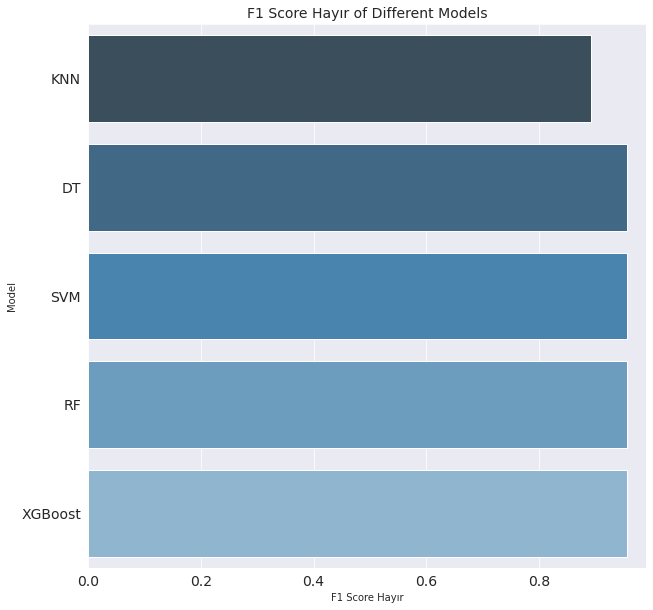

In [127]:
sns.set_style('darkgrid')
compare = pd.DataFrame({"Model": ["KNN", "SVM", "DT", "RF","XGBoost"],
                        "F1 Score Hayır": [knn_f1_hayır, svm_f1_hayır, dt_tuned_f1_hayır, rf_tuned_f1_hayır, xgb_tuned_f1_hayır]})
compare = compare.sort_values(by="F1 Score Hayır", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score Hayır", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score Hayır of Different Models", size=14)
ax.set_xlim(.0, .99)

(0.0, 0.99)

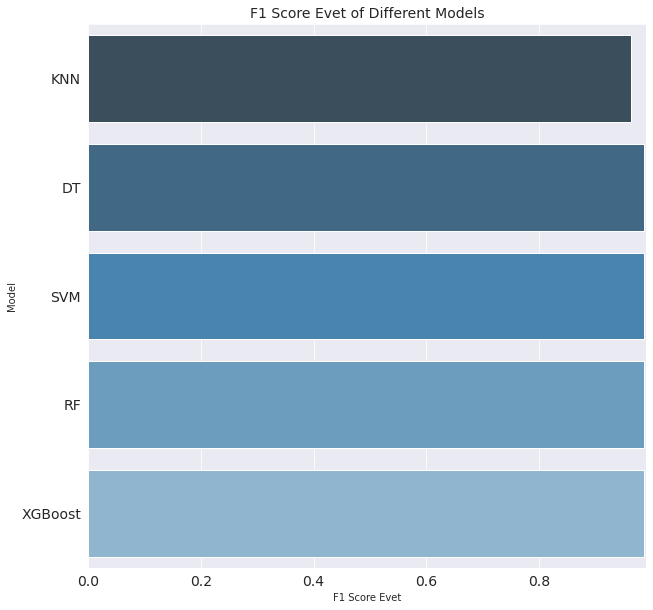

In [138]:
sns.set_style('darkgrid')
compare = pd.DataFrame({"Model": ["KNN", "SVM", "DT", "RF","XGBoost"],
                        "F1 Score Evet": [knn_f1_evet, svm_f1_evet, dt_tuned_f1_evet, rf_tuned_f1_evet, xgb_tuned_f1_evet]})
compare = compare.sort_values(by="F1 Score Evet", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score Evet", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score Evet of Different Models", size=14)
ax.set_xlim(.0, .99)

### Uyguladığımız her algoritmadan sonra GridsearchCV ile parametre ayarlaması yaparak bize en iyi performansı verecek parametreleri elde ettik, optimizasyon sürecini işlettik.

### Grafikten görüldüğü üzere hem 'Hayır' hem de 'Evet' tahmini iyi sonuç/performans sırasıyla XGBoost, RF, DT, SVM ve KNN şeklinde gidiyor.

### Sadece KNN f1_score'lar olarak gözle görlür şekilde düşük performans verdi.

### XGBoost 'Evet' için 0.99, 'Hayır' için 0.96 f1_score üretti. Data'nın imbalanced durumu (çok düşük sayıda row olduğu için) problem yaratmadı. 